<table align="center" width=100%>
    <tr>
        <td width="15%">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=20px>
                    <b>Insurance Premium Prediction<br> According to customer risk
                    </b>
                </font>
        </td>
    </tr>
</table>

## Problem Statement
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs


## Data Definition

**age** : Age of the policyholder (Numeric)

**sex:** Gender of policyholder (Categoric)

**weight:** Weight of the policyholder (Numeric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**no_of_dependents:** Number of dependent persons on the policyholder (Numeric)

**smoker:** Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

**claim:** The amount claimed by the policyholder (Numeric)

**bloodpressure:** Bloodpressure reading of policyholder (Numeric)

**diabetes:** Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

**regular_ex:** A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)

**job_title:** Job profile of the policyholder (Categoric)

**city:** The city in which the policyholder resides (Categoric)

**hereditary_diseases:**  A policyholder suffering from a hereditary diseases or not (Categoric)

<a id='import_lib'></a>
## 1. Import Libraries

In [6]:
# supress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

<a id='set_options'></a>
## 2. Set Options

In [7]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.2f}'.format

<a id='Read_Data'></a>
## 3. Read Data

In [8]:
# read csv file using pandas
df_insurance = pd.read_csv("/content/healthinsurancefiinal.csv")

# display the top 5 rows of the dataframe
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.00,male,64,24.30,NoDisease,1,0,NewYork,72,0,0,Actor,13112.60
1,49.00,female,75,22.60,NoDisease,1,0,Boston,78,1,1,Engineer,9567.00
2,32.00,female,64,17.80,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.20
3,61.00,female,53,36.40,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.60
4,19.00,female,50,20.60,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.70


<a id='data_preparation'></a>
## 4. Data Analysis and Preparation


<a id='Data_Understanding'></a>
### 4.1 Understand the Dataset

<a id='Data_Shape'></a>
### 4.1.1 Data Dimension

In [9]:
df_insurance.shape

(15000, 13)

### 4.1.2 Data Types


**1. Check data types**

In [10]:
df_insurance.dtypes

,0
age,float64
sex,object
weight,int64
bmi,float64
hereditary_diseases,object
no_of_dependents,int64
smoker,int64
city,object
bloodpressure,int64
diabetes,int64


**2. Change the incorrect data types**

In [11]:
# use .astype() to change the data type
# convert numerical variables to categorical

# convert numeric variable 'smoker' to object (categorical) variable
df_insurance.smoker = df_insurance.smoker.astype('object')       # or .astype('O')

# convert numeric variable 'diabetes' to object (categorical) variable
df_insurance.diabetes = df_insurance.diabetes.astype('object')

# convert 'regular_ex' variable diabetes to object (categorical) variable
df_insurance.regular_ex = df_insurance.regular_ex.astype('object')

**3. Recheck the data types after the conversion**

In [12]:
# recheck the data types using .dtypes
df_insurance.dtypes

,0
age,float64
sex,object
weight,int64
bmi,float64
hereditary_diseases,object
no_of_dependents,int64
smoker,object
city,object
bloodpressure,int64
diabetes,object


Note the data types are now as per the data definition. Now we can proceed with the analysis.

<a id='Summary_Statistics'></a>
### 4.1.3 Summary Statistics

In [13]:
# describe the numerical data
df_insurance.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,14604.00,15000.00,14044.00,15000.00,15000.00,15000.00
mean,39.55,64.91,30.27,1.13,68.65,13401.44
std,14.02,13.70,6.12,1.23,19.42,12148.24
min,18.00,34.00,16.00,0.00,0.00,1121.90
25%,27.00,54.00,25.70,0.00,64.00,4846.90
50%,40.00,63.00,29.40,1.00,71.00,9545.65
75%,52.00,76.00,34.40,2.00,80.00,16519.12
max,64.00,95.00,53.10,5.00,122.00,63770.40


**2. For categorical features, we use .describe(include=object)**

In [14]:
# describe the categorical data
# include=object: selects the categorical features
df_insurance.describe(include = object)


,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,Nashville,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


<a id='Missing_Values'></a>
### 4.1.4 Missing Values

In [15]:
# Find total missing values
Total = df_insurance.isnull().sum().sort_values(ascending=False)
Total

,0
bmi,956
age,396
sex,0
weight,0
hereditary_diseases,0
no_of_dependents,0
smoker,0
city,0
bloodpressure,0
diabetes,0


In [16]:
# Find percent missing values
Percent = (df_insurance.isnull().sum()*100/df_insurance.isnull().count()).sort_values(ascending=False)

# concat the 'Total' and 'Percent' columns using 'concat' function
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
bmi,956,6.37
age,396,2.64
sex,0,0.00
weight,0,0.00
hereditary_diseases,0,0.00
no_of_dependents,0,0.00
smoker,0,0.00
city,0,0.00
bloodpressure,0,0.00
diabetes,0,0.00


The missing values are present in the data for the `age` and `bmi` variables. There are 396 (2.6%) missing values for the variable `age` and 956 (6.4%) missing values for the variable `bmi`

### Deal with Missing Values

Discuss - How to deal with missing data?<br>


In [17]:
# check the average age for male and female

df_insurance['age'].groupby(df_insurance['sex'], axis=0).mean()

,age
sex,
female,39.36
male,39.74


The average age for the male and female is nearly the same. We will fill in missing values with the mean age of the policyholder.

In [18]:
# fill the missing values with the mean value of 'age' using 'fillna()'
df_insurance['age'].fillna(df_insurance['age'].mean(), inplace=True)

Replace missing values by mean for the BMI.


In [19]:
# fill the missing values with the mean value of 'bmi' using 'fillna()'

df_insurance['bmi'].fillna(df_insurance['bmi'].mean(), inplace=True)

We have seen that the the minimum bloodpressure is 0, which is absurd. It implies that these are missing values.
Let us replace these missing values with the median value.

In [20]:
# calculate the median of the bloodpressure using 'median()''
median_bloodpressure = df_insurance['bloodpressure'].median()

# replace zero values by median using 'replace()'
df_insurance['bloodpressure'] = df_insurance['bloodpressure'].replace(0,median_bloodpressure)

Recheck the summary statistics to confirm the missing value treatment for the variable 'bloodpressure'.

In [21]:
# obtain the summary statistics of numeric variables using 'describe()'
df_insurance.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00
mean,39.55,64.91,30.27,1.13,72.23,13401.44
std,13.83,13.70,5.92,1.23,11.27,12148.24
min,18.00,34.00,16.00,0.00,40.00,1121.90
25%,27.00,54.00,25.90,0.00,64.00,4846.90
50%,40.00,63.00,29.80,1.00,71.00,9545.65
75%,51.00,76.00,34.10,2.00,80.00,16519.12
max,64.00,95.00,53.10,5.00,122.00,63770.40


To confirm the data is valid, observe the minimum and maximum value of the variable `bloodpressure` is 40

<a id='correlation'></a>
### 4.1.5 Correlation

In [22]:

df_numeric_features = df_insurance.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

In [23]:
# generate the correlation matrix
corr =  df_numeric_features.corr()
corr

,age,weight,bmi,no_of_dependents,bloodpressure,claim
age,1.00,0.28,0.18,0.06,0.02,0.30
weight,0.28,1.00,0.24,0.14,0.02,0.08
bmi,0.18,0.24,1.00,0.05,-0.05,0.20
no_of_dependents,0.06,0.14,0.05,1.00,0.04,0.07
bloodpressure,0.02,0.02,-0.05,0.04,1.00,0.04
claim,0.30,0.08,0.20,0.07,0.04,1.00


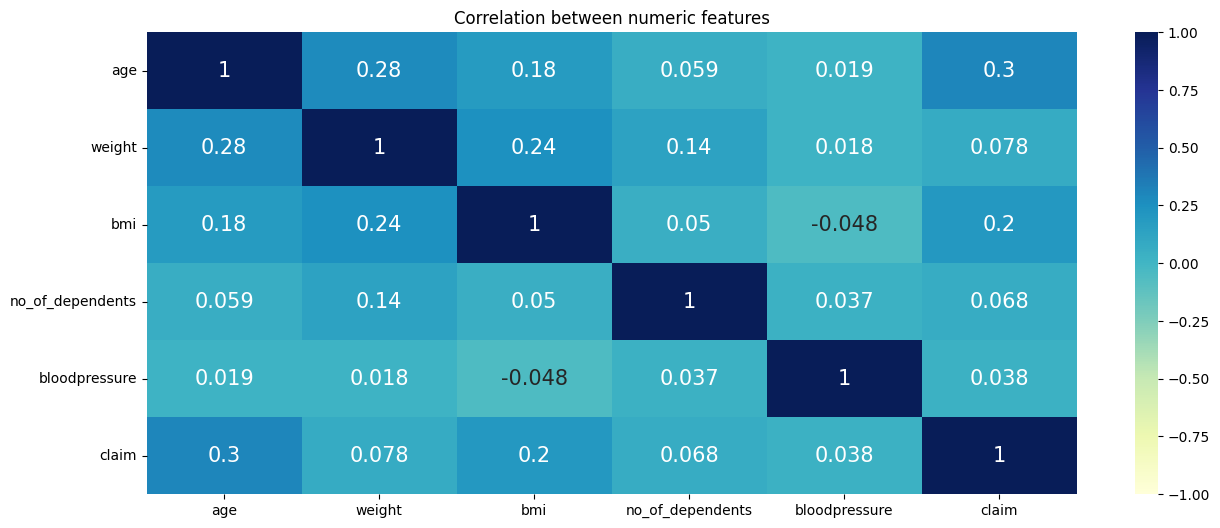

In [24]:
# set the figure size
plt.figure(figsize=(15, 6))

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )
plt.title('Correlation between numeric features')
plt.show()

<a id='categorical'></a>
### 4.1.6 Analyze Categorical Variables



In [25]:
df_insurance.describe(include=object)

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,Nashville,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


There are 6 categorical variables. From the output we see that the variable cities has most number of categories. There are 91 cities in the data, of which NewOrleans occurs highes number of times.

Let us visualize the variables. However, we shall exculde the variable `city` from it.

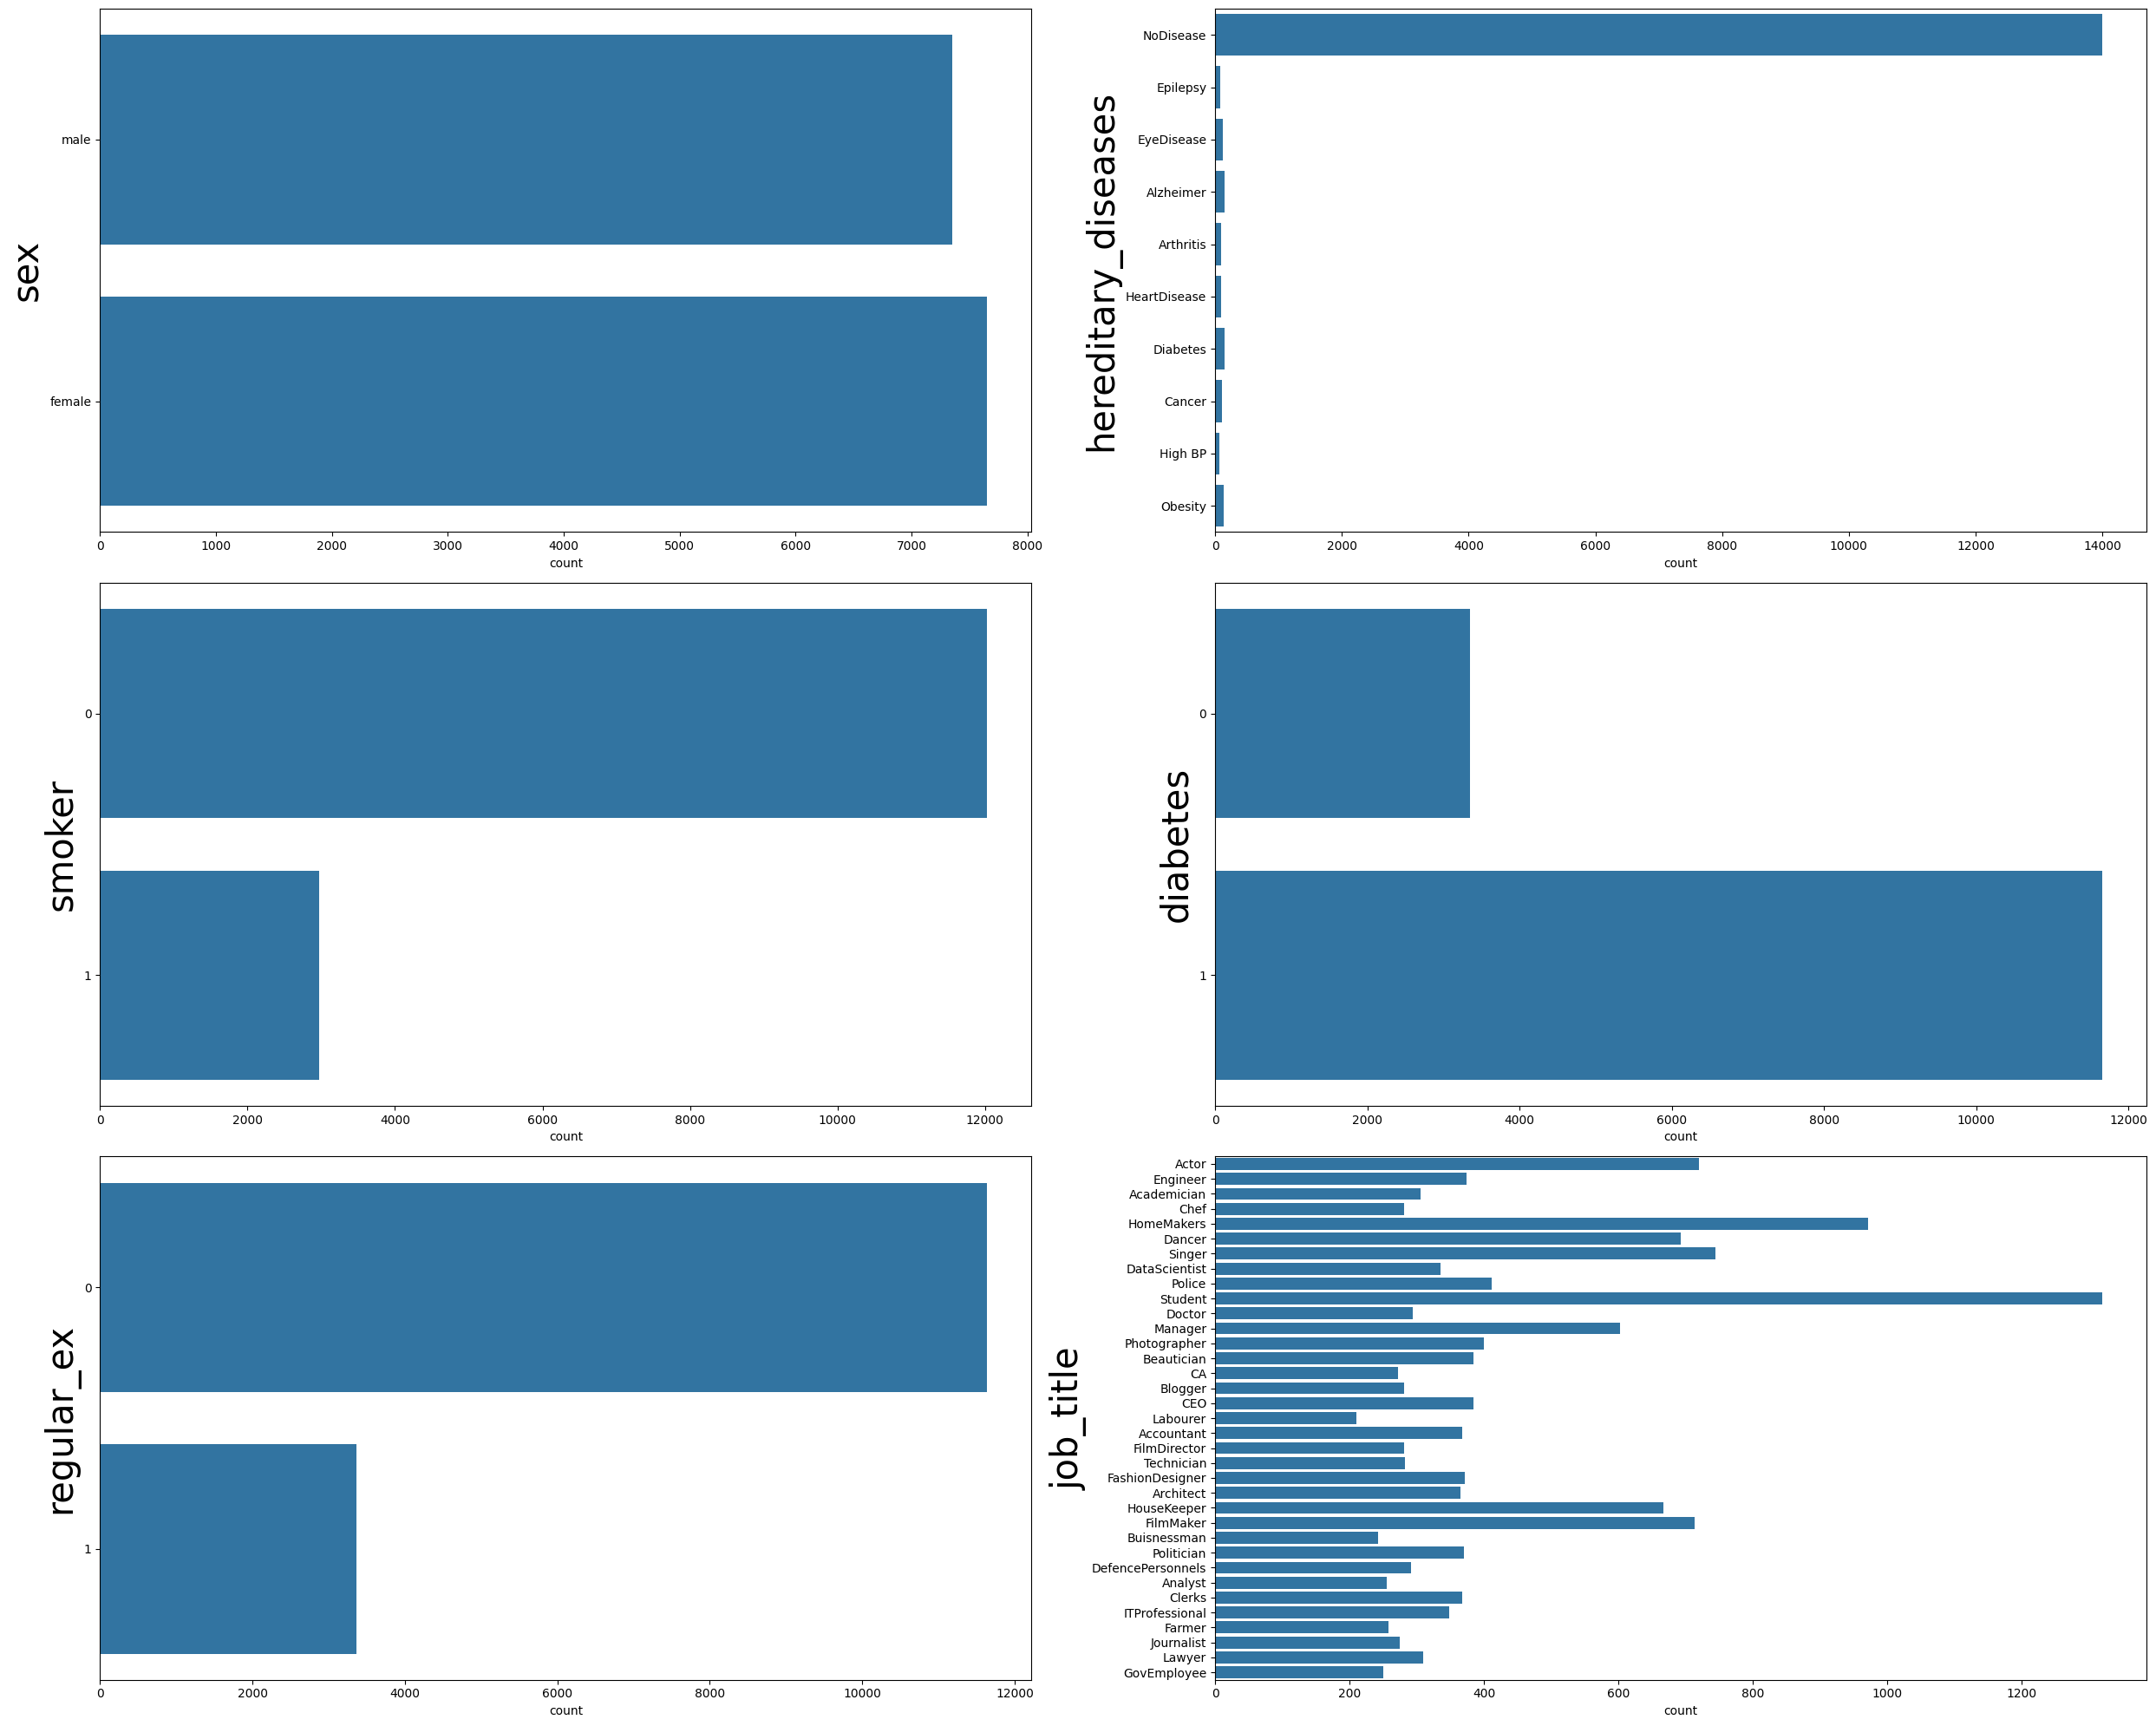

In [26]:
# create a list of all categorical variables
df_categoric_features = df_insurance.select_dtypes(include='object').drop(['city'], axis=1)

# plot the count distribution for each categorical variable
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 2, figsize=(25, 20))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):

    countplot = sns.countplot(y=df_insurance[variable], ax=subplot )

    countplot.set_ylabel(variable, fontsize = 30)

plt.tight_layout()
plt.show()

Now consider the variable `city`.

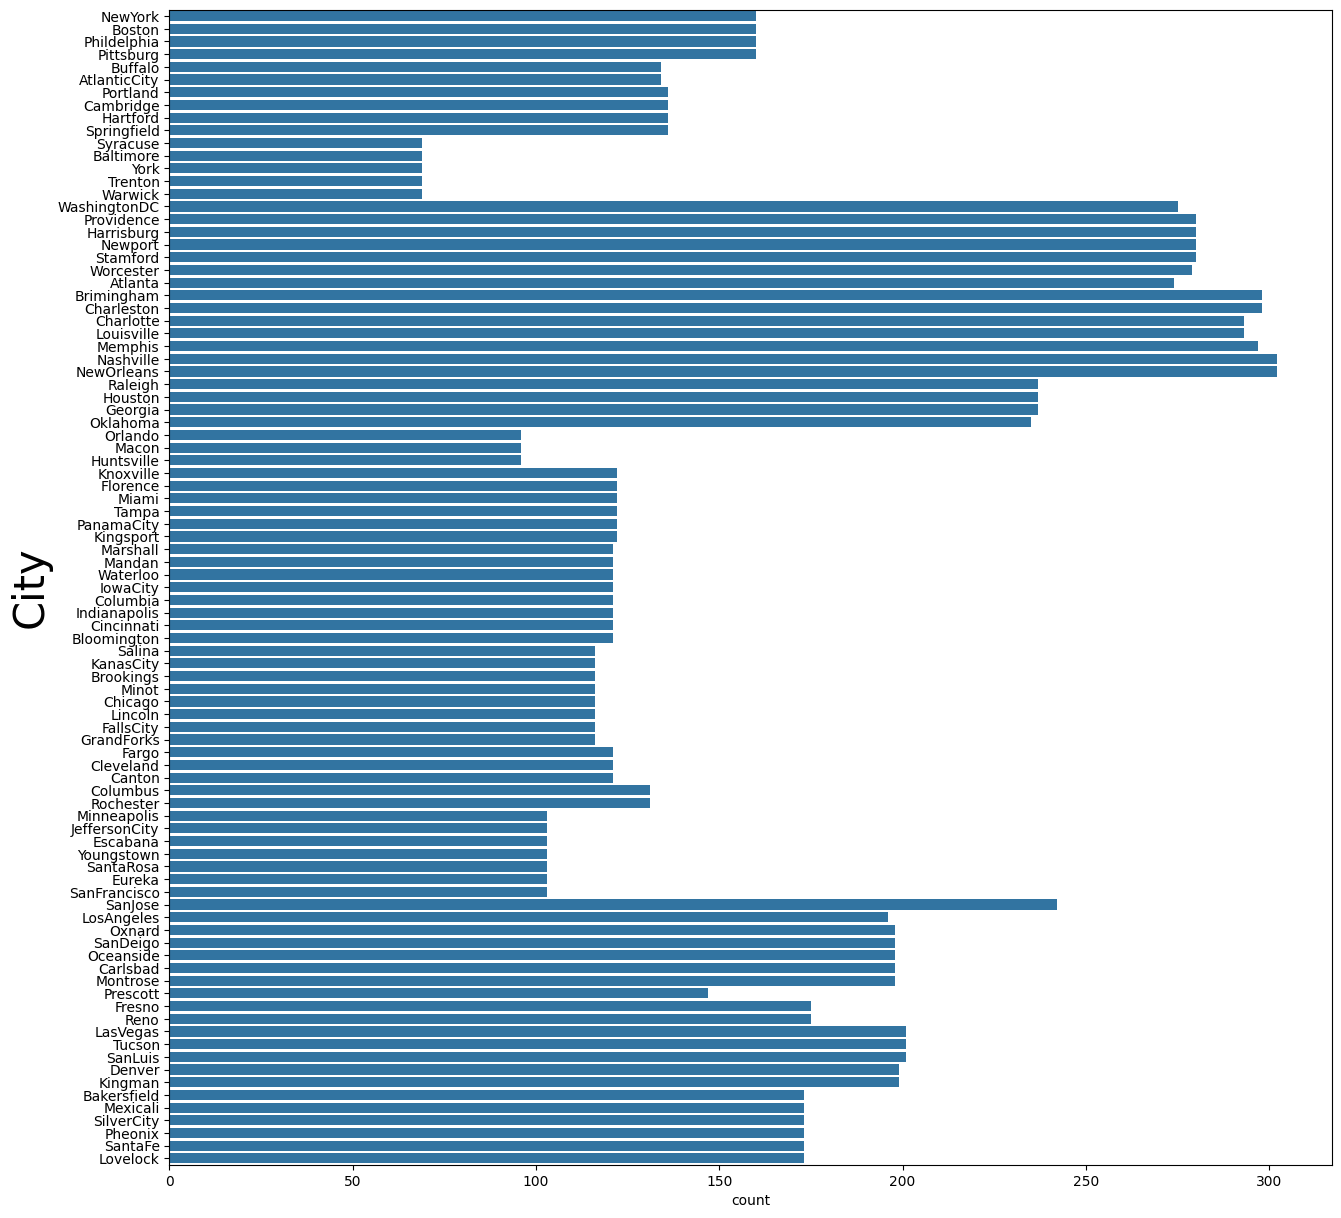

In [27]:
# set the figure size
plt.figure(figsize=(15, 15))
countplot = sns.countplot(y=df_insurance['city'], orient="h")
countplot.set_ylabel('City', fontsize = 30)
plt.show()

### 4.1.7 Analyze Relationship Between Target and Categorical Variables

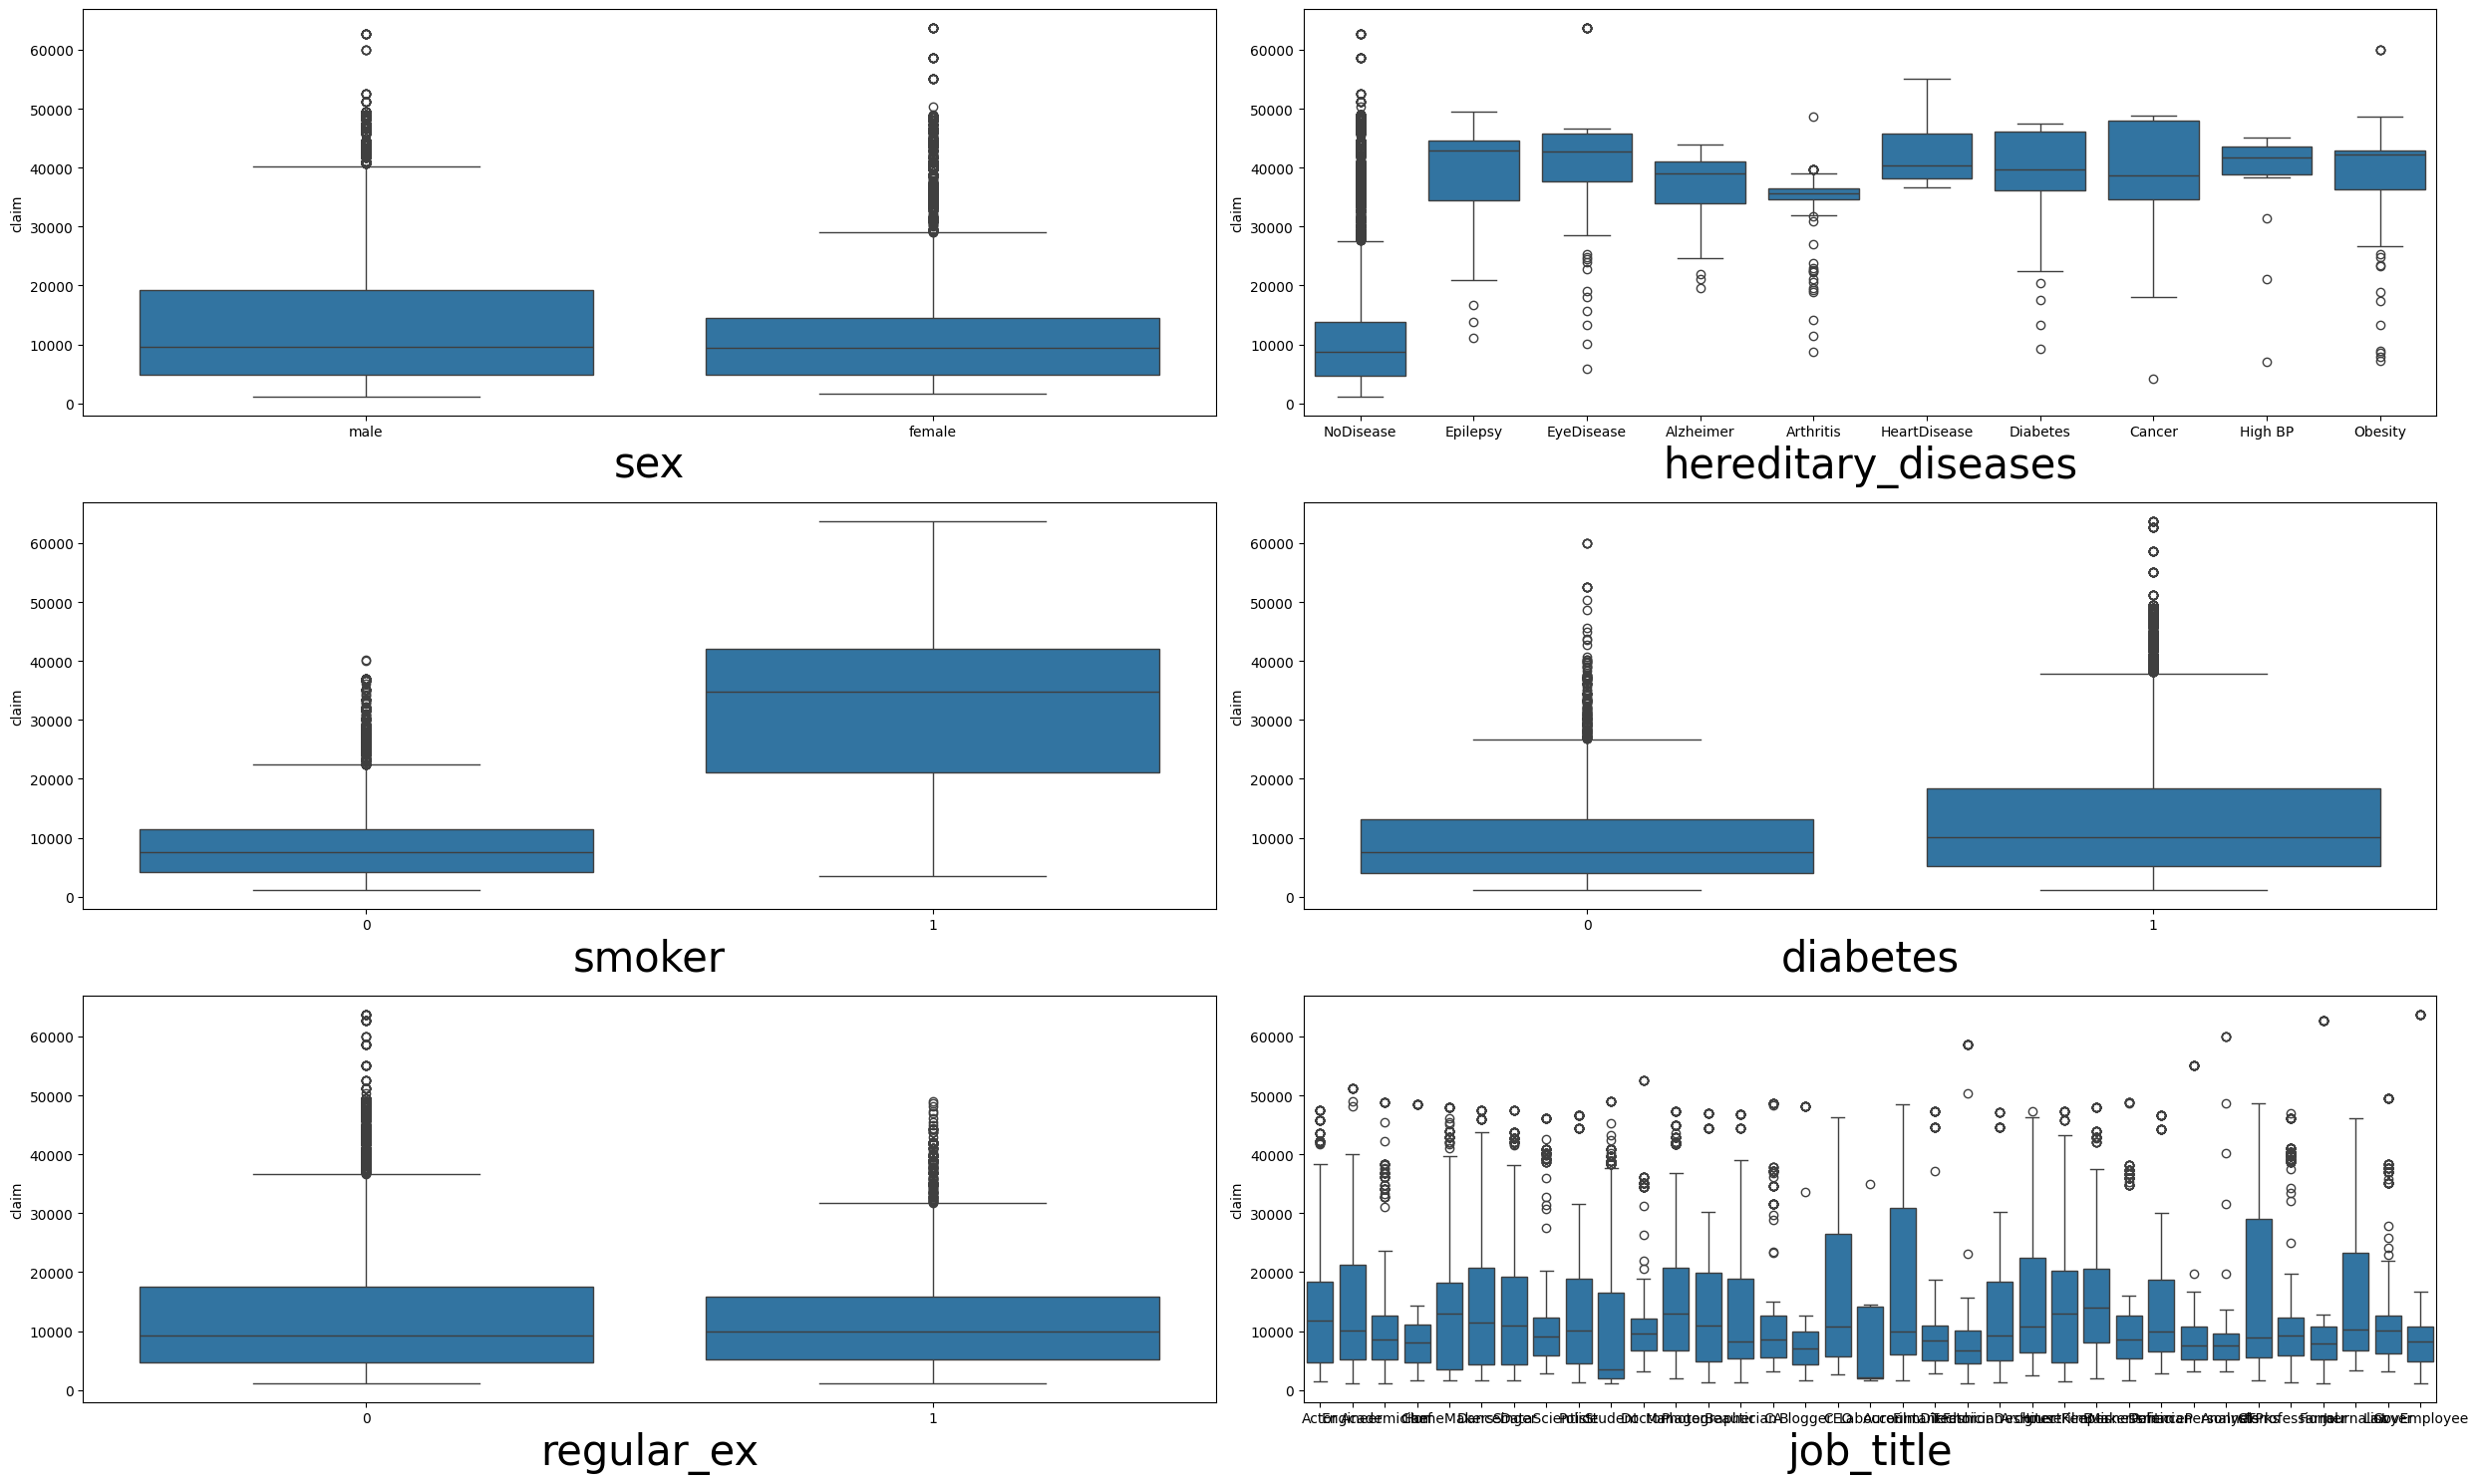

In [28]:
# plot the boxplot for each categorical variable
# create subplots using subplots()
# 6 subplots in 3 rows and 2 columns
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 2, figsize=(25, 15))

# plot a boxplot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):

    # x: variable on x-axis
    # y: variable in y-axis
    # data: dataframe to be used
    # ax: specifies the axes object to draw the plot onto
    boxplt = sns.boxplot(x=variable, y='claim', data=df_insurance, ax=subplot)

    # set the x-axis labels
    # fontsize = 30: sets the font size to 30
    boxplt.set_xlabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()
plt.tight_layout()

# display the plot
plt.show()

Since the variable `city` has 91 categories, we shall plot it separately.

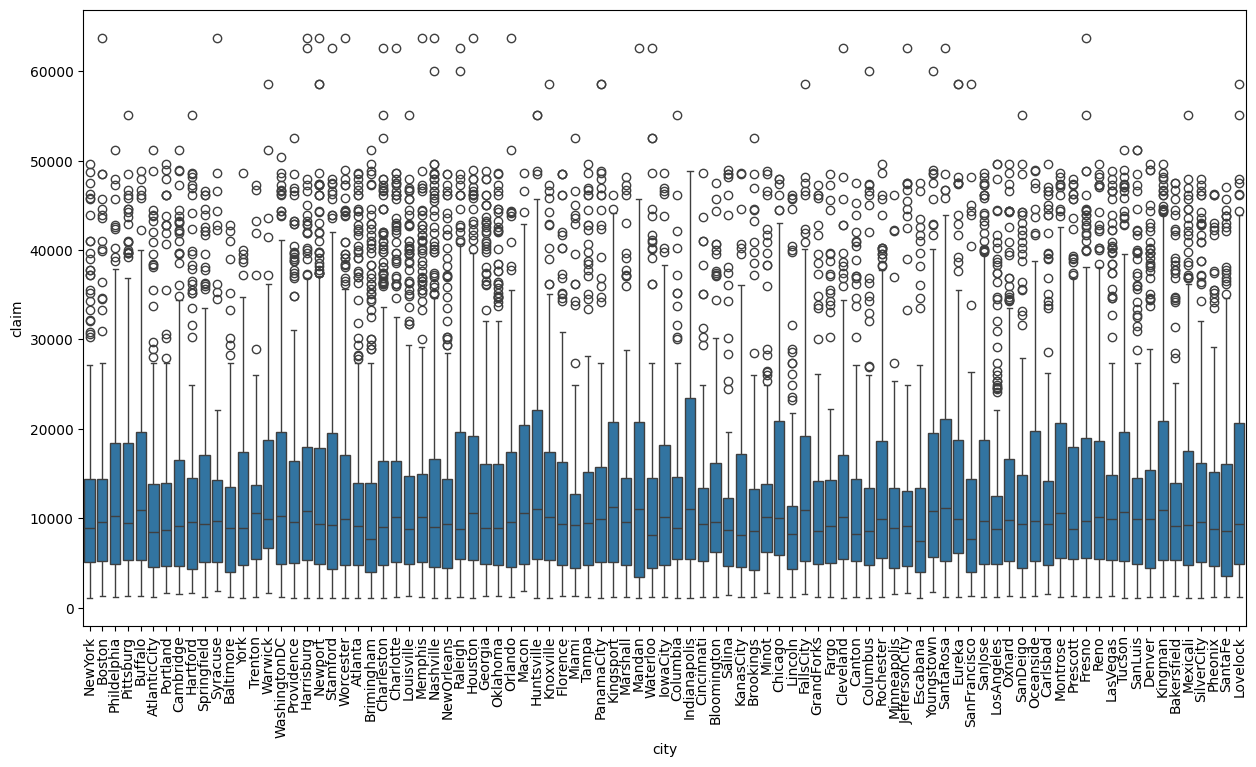

In [29]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the boxplot for categorical variable 'city'

ax = sns.boxplot(x=df_insurance["city"], y=df_insurance['claim'], data=df_insurance)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 10)
plt.show()

<a id='Feature_Engineering'></a>
### 4.1.8 Feature Engineering

Create a new feature 'region' by combining the cities.

**There are 91 unique cities. We will divide these cities into North-East, West, Mid-West, and South regions.**

Let's create a new variable region. We will replace the original variable `city` with it.

In [30]:
# create a region column and combine the north-east cities
df_insurance['region'] = df_insurance['city'].replace(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
                                                       'AtlanticCity','Portland', 'Cambridge', 'Hartford',
                                                       'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton',
                                                       'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg',
                                                       'Newport', 'Stamford', 'Worcester'],
                                                      'North-East')

In [31]:
# combine all the southern cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
                                                         'Louisville', 'Memphis', 'Nashville', 'NewOrleans',
                                                         'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando',
                                                         'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami',
                                                         'Tampa', 'PanamaCity', 'Kingsport', 'Marshall'],
                                                         'Southern')

In [32]:
# combine all the mid-west cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Mandan', 'Waterloo', 'IowaCity', 'Columbia',
                                                         'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
                                                         'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
                                                         'FallsCity', 'GrandForks', 'Fargo', 'Cleveland',
                                                         'Canton', 'Columbus', 'Rochester', 'Minneapolis',
                                                         'JeffersonCity', 'Escabana','Youngstown'],
                                                         'Mid-West')

In [33]:
# combine all the western cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose',
                                                         'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside',
                                                         'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno',
                                                         'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman',
                                                         'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix',
                                                         'SantaFe', 'Lovelock'],
                                                         'West')

In [34]:
# check the unique values of the region using 'unique()'
df_insurance['region'].unique()

array(['North-East', 'Southern', 'Mid-West', 'West'], dtype=object)

In [35]:
df_insurance['region'].value_counts()

,count
region,
Southern,4444
West,4273
North-East,3471
Mid-West,2812


In [36]:
# drop the 'city' variable from the dataset using drop()
df_insurance = df_insurance.drop(['city'], axis=1)

Check whether the new variable added into the data frame or not.

In [37]:
# display the top 5 rows of the dataframe
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim,region
0,60.00,male,64,24.30,NoDisease,1,0,72,0,0,Actor,13112.60,North-East
1,49.00,female,75,22.60,NoDisease,1,0,78,1,1,Engineer,9567.00,North-East
2,32.00,female,64,17.80,Epilepsy,2,1,88,1,1,Academician,32734.20,North-East
3,61.00,female,53,36.40,NoDisease,1,1,72,1,0,Chef,48517.60,North-East
4,19.00,female,50,20.60,NoDisease,0,0,82,1,0,HomeMakers,1731.70,North-East


<a id='outliers'></a>
### 4.1.9 Discover Outliers

**1. Plot boxplot for numerical data**

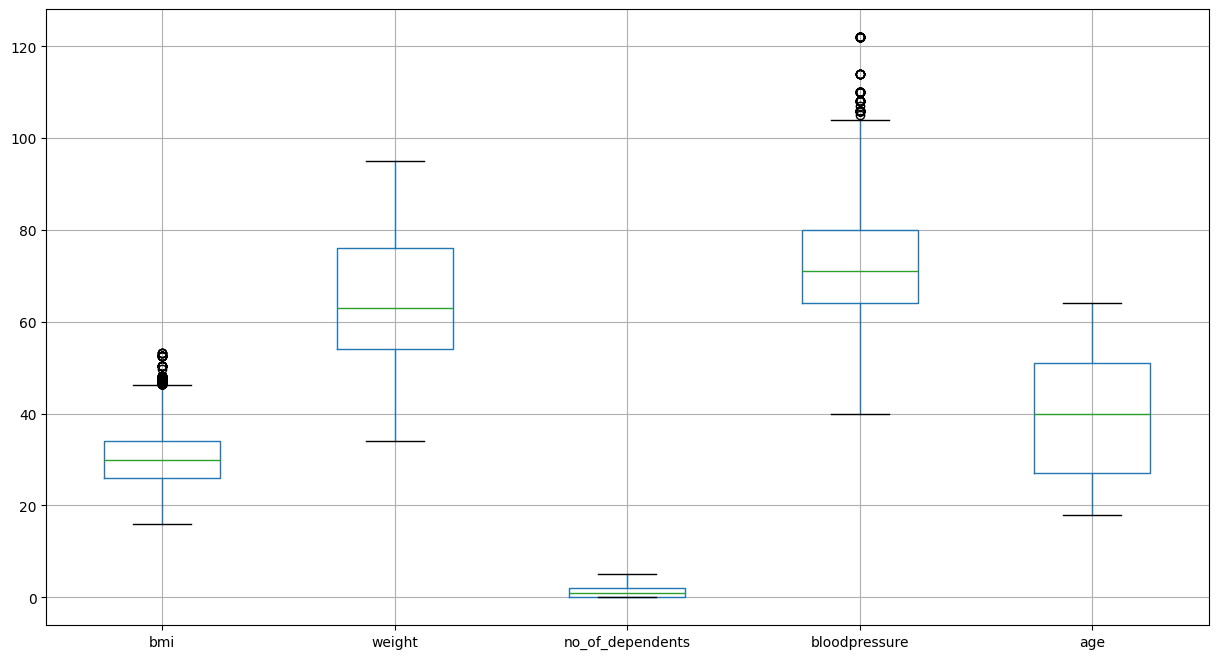

In [38]:
plt.rcParams['figure.figsize']=(15,8)
df_numeric_features.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'])
plt.show()

**2. Note the variables for which outliers are present**

From the above plot, we notice that for the variable 'bmi' and 'bloodpressure' contain outliers

**3. Remove outliers by IQR method**

In [39]:
# calculate interquartile range

# compute the first quartile using quantile(0.25)
# use .drop() to drop the target variable
Q1 = df_numeric_features.drop(['claim'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable
Q3 = df_numeric_features.drop(['claim'], axis=1).quantile(0.75)

# calculate of interquartile range
IQR = Q3 - Q1
print(IQR)
print('*/'*75)
print(Q1)
print('*/'*75)
print(Q3)

age                24.00
weight             22.00
bmi                 8.20
no_of_dependents    2.00
bloodpressure      16.00
dtype: float64
*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/
age                27.00
weight             54.00
bmi                25.90
no_of_dependents    0.00
bloodpressure      64.00
Name: 0.25, dtype: float64
*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/
age                51.00
weight             76.00
bmi                34.10
no_of_dependents    2.00
bloodpressure      80.00
Name: 0.75, dtype: float64


In [40]:
# Calculate Q1, Q3, and IQR for specified columns
Q1 = df_insurance[['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure']].quantile(0.25)
Q3 = df_insurance[['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition for each column
outlier_condition = ((df_insurance[['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure']] < (Q1 - 1.5 * IQR)) |
                     (df_insurance[['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure']] > (Q3 + 1.5 * IQR)))

# Filter rows where any of the outlier conditions is true
df_insurance_cleaned = df_insurance[~outlier_condition.any(axis=1)]

A simple way to know whether the outliers have been removed or not is to check the dimensions of the data.

There is a reduction in the number of rows(from 15000 to 14723).

**4. Plot boxplot to recheck for outliers**

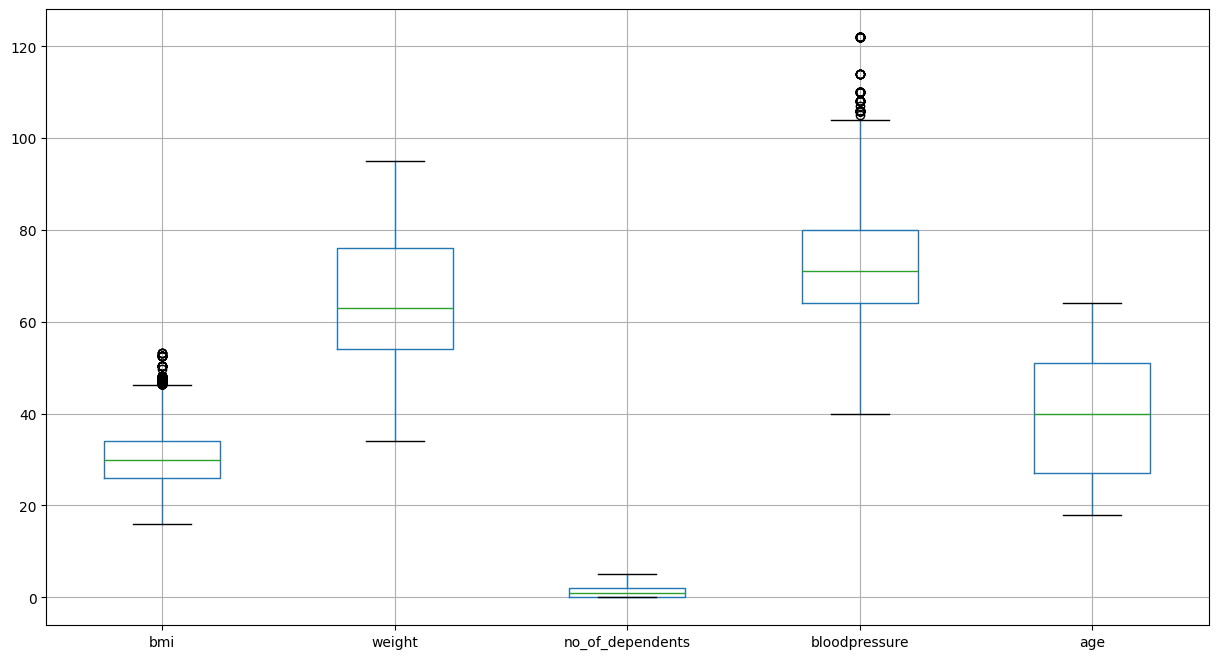

In [41]:
plt.rcParams['figure.figsize']=(15,8)

df_insurance.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'])
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that you see are moderate outliers that lie within the min/max range before removing the actual outliers

### 4.1.10 Recheck the Correlation

In [42]:
df_numeric_features = df_insurance.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

In [43]:

corr =  df_numeric_features.corr()

# print the correlation matrix
corr

,age,weight,bmi,no_of_dependents,bloodpressure,claim
age,1.00,0.28,0.18,0.06,0.02,0.30
weight,0.28,1.00,0.24,0.14,0.02,0.08
bmi,0.18,0.24,1.00,0.05,-0.05,0.20
no_of_dependents,0.06,0.14,0.05,1.00,0.04,0.07
bloodpressure,0.02,0.02,-0.05,0.04,1.00,0.04
claim,0.30,0.08,0.20,0.07,0.04,1.00


**3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix**

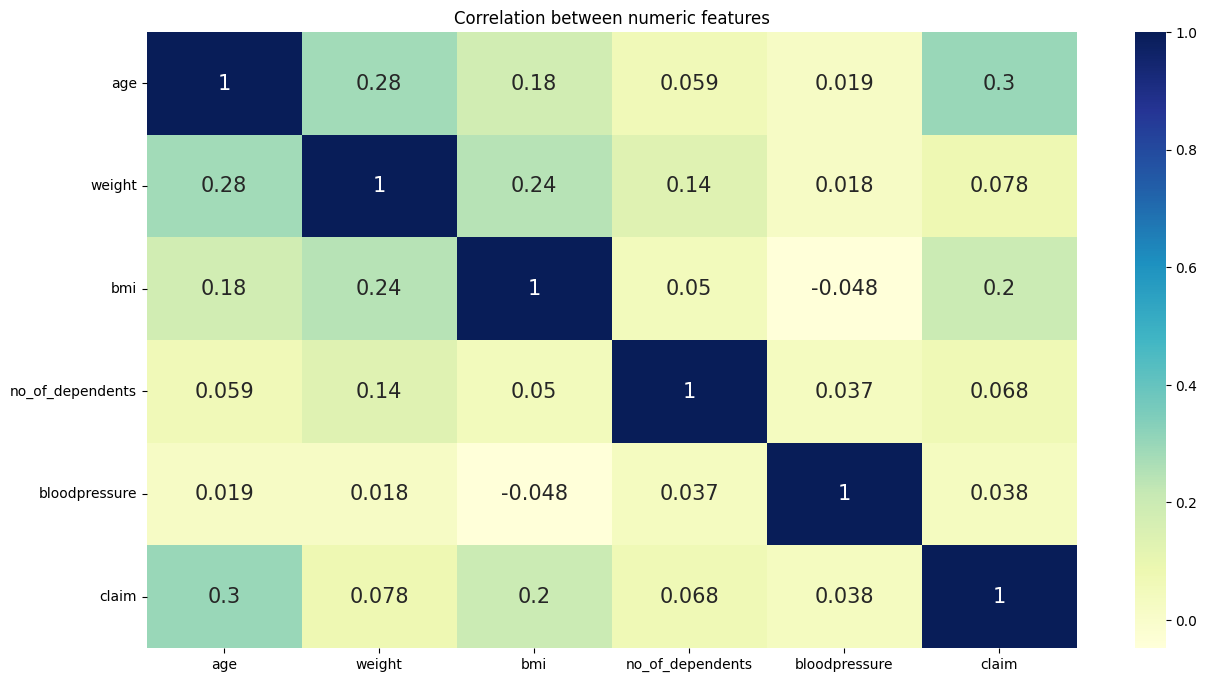

In [44]:
plt.figure(figsize=(15, 8))

sns.heatmap(corr, cmap='YlGnBu', annot = True, annot_kws={"size": 15})
plt.title('Correlation between numeric features')
plt.show()

In [45]:
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import scipy.stats as stats
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tools.eval_measures import rmse
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from statsmodels.tsa.stattools import adfuller
#from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels
from pandas.tseries.offsets import DateOffset

In [46]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for column in df_insurance.columns:
    # Check if the column dtype is object (categorical)
    if df_insurance[column].dtype == 'object':
        # Fit label encoder and transform the column
        df_insurance[column] = label_encoder.fit_transform(df_insurance[column])

# Now df1 contains the label encoded values
df_insurance.tail(5)


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim,region
14995,39.00,1,49,28.30,8,1,1,54,1,0,20,21082.20,2
14996,39.00,1,74,29.60,8,4,0,64,1,0,33,7512.30,2
14997,20.00,1,62,33.30,8,0,0,52,1,0,18,1391.50,2
14998,52.00,1,88,36.70,8,0,0,70,1,0,17,9144.60,2
14999,52.00,1,57,26.40,8,3,0,72,1,0,28,25992.80,2


In [47]:
df_insurance['region'].value_counts()

,count
region,
2,4444
3,4273
1,3471
0,2812


In [48]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample data (replace this with your own dataset)
data = {
    'age': [25, 32, 47, 51, 62],
    'bmi': [22.0, 28.5, 26.3, 30.2, 29.1],
    'weight': [60, 75, 85, 90, 95]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Convert back to DataFrame with same column names
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

print("Original Data:\n", df)
print("\nStandardized Data:\n", df_scaled)


Original Data:
    age   bmi  weight
0   25 22.00      60
1   32 28.50      75
2   47 26.30      85
3   51 30.20      90
4   62 29.10      95

Standardized Data:
     age   bmi  weight
0 -1.38 -1.80   -1.69
1 -0.86  0.44   -0.48
2  0.27 -0.32    0.32
3  0.57  1.03    0.73
4  1.40  0.65    1.13


In [49]:
X = df_insurance.drop('claim',axis=1)    # Independent Features
y = df_insurance['claim']               # Dependent Features

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
# Splitting data into Train and Test


In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10500, 12)
(4500, 12)
(10500,)
(4500,)


In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse

# Instantiate and train the DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

# Evaluate the model
print('RMSE score of train data:', rmse(y_train, y_train_pred))
print('R^2 score of train data:', r2_score(y_train, y_train_pred))

print('RMSE score of test data:', rmse(y_test, y_test_pred))
print('R^2 score of test data:', r2_score(y_test, y_test_pred))


RMSE score of train data: 1.8470266109581064
R^2 score of train data: 0.9999999768406748
RMSE score of test data: 2744.611154696723
R^2 score of test data: 0.9491657338349522


Comments on Result:
Your model's performance indicates severe overfitting:

Train Data:

The RMSE (Root Mean Square Error) is high (1.845),  meaning the model has not perfectly learned the training data.
The R² score is 0.99, which confirms that the model explains 99% of the variance in the training set.
Test Data:

The RMSE jumps to 2853.67, indicating a significant error in predictions.
The R² score is 0.95, meaning the model explains 95% of the variance in the test set, which is poor.
Conclusion:
Your model is highly overfitting the training data and generalizing poorly to unseen data. You should consider:

Regularization (L1/L2 penalties, dropout in neural networks)
Feature selection/reduction (removing redundant or highly correlated features)
More diverse training data (to prevent memorization)
Cross-validation (to ensure model robustness)
Simplifying the model (reducing complexity to avoid overfitting)


In [53]:
dtree = DecisionTreeRegressor() # estimator


param_dist = {
    'max_depth': np.arange(5, 20),
    'min_samples_leaf': [15, 17, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 8, 10, 12, 15]
}



rsearch  = RandomizedSearchCV(dtree, param_distributions = param_dist, cv=4)

rsearch.fit(X,y)
rsearch.best_params_

{'min_samples_split': 10, 'min_samples_leaf': 15, 'max_depth': np.int64(16)}

In [54]:
dtree_rand_tuned = DecisionTreeRegressor(**rsearch.best_params_)
dtree_rand_tuned.fit(X_train,y_train)


ytrain_pred = dtree_rand_tuned.predict(X_train)
print('RMSE on train data: ', rmse(y_train, ytrain_pred) )
print('R^2 on train data: ', r2_score(y_train, ytrain_pred))


ytest_pred = dtree_rand_tuned.predict(X_test)
print('RMSE on test data: ', rmse(y_test, ytest_pred) )
print('R^2 on test data: ', r2_score(y_test, ytest_pred))

RMSE on train data:  3132.6056672475775
R^2 on train data:  0.9333820821499359
RMSE on test data:  3661.6596437919975
R^2 on test data:  0.909520361333313


In [55]:
rf2 = RandomForestRegressor()


param_dist = { 'n_estimators':sp_randint(50,100),
              'max_features': sp_randint(1,14),
              'max_depth' : sp_randint(5,20),
             'min_samples_leaf':sp_randint(10,50),
              'min_samples_split':sp_randint(2,50)}


rsearch_rf  = RandomizedSearchCV(estimator=rf2, param_distributions = param_dist, cv=4, random_state=4)

rsearch_rf.fit(X,y)
rsearch_rf.best_params_

{'max_depth': 19,
 'max_features': 11,
 'min_samples_leaf': 13,
 'min_samples_split': 2,
 'n_estimators': 71}

In [56]:
rsearch_rf.best_score_

np.float64(0.9330185028965764)

In [57]:
rf_tuned = RandomForestRegressor(**rsearch_rf.best_params_)

rf_tuned.fit(X_train,y_train)

ytrain_pred = rf_tuned.predict(X_train)
print('RMSE on train data: ', rmse(y_train, ytrain_pred))
print('R^2 on train data: ', r2_score(y_train, ytrain_pred))

ytest_pred = rf_tuned.predict(X_test)
print('RMSE on test data: ', rmse(y_test, ytest_pred))
print('R^2 on test data: ', r2_score(y_test, ytest_pred))

RMSE on train data:  2868.8713592188383
R^2 on train data:  0.9441270315079943
RMSE on test data:  3307.3143989341047
R^2 on test data:  0.9261847876122378


In [58]:
et = ExtraTreesRegressor()
et.fit(X_train, y_train)

ytrain_pred =  et.predict(X_train)
print('RMSE of Train Data: ', rmse(y_train, ytrain_pred))
print('R^2 score of Train Data: ', r2_score(y_train, ytrain_pred))


ytest_pred =  et.predict(X_test)
print('RMSE of Test Data: ', rmse(y_test, ytest_pred))
print('R^2 score of Test Data: ', r2_score(y_test, ytest_pred))

RMSE of Train Data:  1.8470266109581062
R^2 score of Train Data:  0.9999999768406748
RMSE of Test Data:  2094.255445692398
R^2 score of Test Data:  0.9704025553399594


In [59]:
etr2 = ExtraTreesRegressor()


param_dist = { 'n_estimators':sp_randint(50,100),
              'max_features': sp_randint(1,14),
              'max_depth' : sp_randint(5,20),
             'min_samples_leaf':sp_randint(10,50),
              'min_samples_split':sp_randint(2,50)}


rsearch_etr  = RandomizedSearchCV(estimator=etr2, param_distributions = param_dist, cv=4, random_state=4)

rsearch_etr.fit(X,y)
rsearch_etr.best_params_

{'max_depth': 19,
 'max_features': 11,
 'min_samples_leaf': 13,
 'min_samples_split': 2,
 'n_estimators': 71}

In [60]:
etr_tuned = ExtraTreesRegressor(**rsearch_etr.best_params_)
etr_tuned.fit(X_train, y_train)

ytrain_pred = etr_tuned.predict(X_train)
print('RMSE on train data: ', rmse(y_train, ytrain_pred))
print('R^2 on train data: ', r2_score(y_train, ytrain_pred))

ytest_pred = etr_tuned.predict(X_test)
print('RMSE on test data: ', rmse(y_test, ytest_pred))
print('R^2 on test data: ', r2_score(y_test, ytest_pred))

RMSE on train data:  2781.749808737103
R^2 on train data:  0.9474689925583093
RMSE on test data:  3190.5221201607624
R^2 on test data:  0.9313060593831101


In [61]:
ada = AdaBoostRegressor(random_state=48)
ada.fit(X_train,y_train)

ytrain_pred = ada.predict(X_train)
print('RMSE on train data: ', rmse(y_train, ytrain_pred))
print('R^2 on train data: ', r2_score(y_train, ytrain_pred))

ytest_pred = ada.predict(X_test)
print('RMSE on test data: ', rmse(y_test, ytest_pred))
print('R^2 on test data: ', r2_score(y_test, ytest_pred))

RMSE on train data:  8820.006561670467
R^2 on train data:  0.4718984860297599
RMSE on test data:  8842.889725341867
R^2 on test data:  0.47230457518832203


In [62]:
grad = GradientBoostingRegressor(random_state=42)
grad.fit(X_train,y_train)

ytrain_pred = grad.predict(X_train)
print('RMSE on train data: ', rmse(y_train, ytrain_pred))
print('R^2 on train data: ', r2_score(y_train, ytrain_pred))

ytest_pred = grad.predict(X_test)
print('RMSE on test data: ', rmse(y_test, ytest_pred))
print('R^2 on test data: ', r2_score(y_test, ytest_pred))

RMSE on train data:  4377.5764404896845
R^2 on train data:  0.869909053683626
RMSE on test data:  4565.686868596376
R^2 on test data:  0.8593281640027431


In [63]:
xg = XGBRegressor(random_state=48)
xg.fit(X_train,y_train)

ytrain_pred = xg.predict(X_train)
print('RMSE on train data: ', rmse(y_train, ytrain_pred))
print('R^2 on train data: ', r2_score(y_train, ytrain_pred))

ytest_pred = xg.predict(X_test)
print('RMSE on test data: ', rmse(y_test, ytest_pred))
print('R^2 on test data: ', r2_score(y_test, ytest_pred))

RMSE on train data:  797.391547154452
R^2 on train data:  0.9956835883980064
RMSE on test data:  2284.8020938679065
R^2 on test data:  0.9647716675133879


In [64]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

ytrain_pred = knn.predict(X_train)
print('RMSE on train data: ', rmse(y_train, ytrain_pred))
print('R^2 on train data: ', r2_score(y_train, ytrain_pred))

ytest_pred = knn.predict(X_test)
print('RMSE on test data: ', rmse(y_test, ytest_pred))
print('R^2 on test data: ', r2_score(y_test, ytest_pred))

RMSE on train data:  2623.4265621928525
R^2 on train data:  0.9532784309773308
RMSE on test data:  3930.888705555628
R^2 on test data:  0.8957259105410301


In [65]:
rf_tuned = RandomForestRegressor(**rsearch_rf.best_params_)
etr_tuned = ExtraTreesRegressor(**rsearch_etr.best_params_)
xg = XGBRegressor(random_state=48)

estimators = [('rf_tuned', rf_tuned),('etr_tuned',etr_tuned), ('xg',xg)]

stack1 = VotingRegressor(estimators=estimators)

stack1.fit(X_train, y_train)

ytrain_pred = stack1.predict(X_train)
print('RMSE on train data: ', rmse(y_train, ytrain_pred))
print('R^2 on train data: ', r2_score(y_train, ytrain_pred))

ytest_pred = stack1.predict(X_test)
print('RMSE on test data: ', rmse(y_test, ytest_pred))
print('R^2 on test data: ', r2_score(y_test, ytest_pred))

RMSE on train data:  2026.229881082703
R^2 on train data:  0.9721287127426141
RMSE on test data:  2716.963764464173
R^2 on test data:  0.9501847168577643


In [66]:
xg = XGBRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'alpha': [0, 0.1, 0.2, 0.3, 0.4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize XGBRegressor with best parameters
xg_best = XGBRegressor(random_state=42, **best_params)

# Fit the model with the best parameters
xg_best.fit(X_train, y_train)

# Predictions on train and test data
ytrain_pred = xg_best.predict(X_train)
ytest_pred = xg_best.predict(X_test)

# Print metrics
print('Best Parameters:', best_params)
print('Best R^2 Score:', best_score)
print('RMSE on train data: ', np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print('R^2 on train data: ', r2_score(y_train, ytrain_pred))
print('RMSE on test data: ', np.sqrt(mean_squared_error(y_test, ytest_pred)))
print('R^2 on test data: ', r2_score(y_test, ytest_pred))


Best Parameters: {'alpha': 0.3, 'learning_rate': 0.2, 'n_estimators': 500, 'subsample': 0.6}
Best R^2 Score: 0.9692636268241707
RMSE on train data:  90.17811282955695
R^2 on train data:  0.999944794559305
RMSE on test data:  2191.1940618219237
R^2 on test data:  0.9675991357202708


In [76]:
import pandas as pd

# Corrected: 'ge' → 'ag'
input_data = [(39.0, 1, 74, 29.6, 8, 4, 0, 64, 1, 0, 33, 2)]

columns = ['age', 'sex', 'weight', 'bmi', 'hereditary_diseases', 'no_of_dependents',
           'smoker', 'bloodpressure', 'diabetes', 'regular_ex', 'job_title', 'region']

input_frame = pd.DataFrame(input_data, columns=columns)

# Predict
result = grad.predict(input_frame)
print("Predicted Claim Amount:", result[0])


Predicted Claim Amount: 7255.215557091475


In [77]:
import pickle as pkl

In [80]:
pkl.dump(grad, open('MLProjectFinal.pkl','wb'))